# transformations de puissance sur des variables numériques

Les fonctions exponentielles ou puissances sont des transformations mathématiques qui suivent $ X_t = X^{lambda}$ où lambda peut être n'importe quel exposant. Les transformations de racine carrée et cubique sont des cas particuliers de transformations de puissance où lambda est de 1/2 ou 1/3, respectivement. En pratique, nous essayons différents lambdas pour déterminer celui qui offre la meilleure transformation. Dans cette recette, nous effectuerons des transformations de puissance à l'aide de NumPy, scikit-learn et Feature-engine

In [2]:
!pip install feature_engine

In [4]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer

In [5]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# print top 5 rows (not in book)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


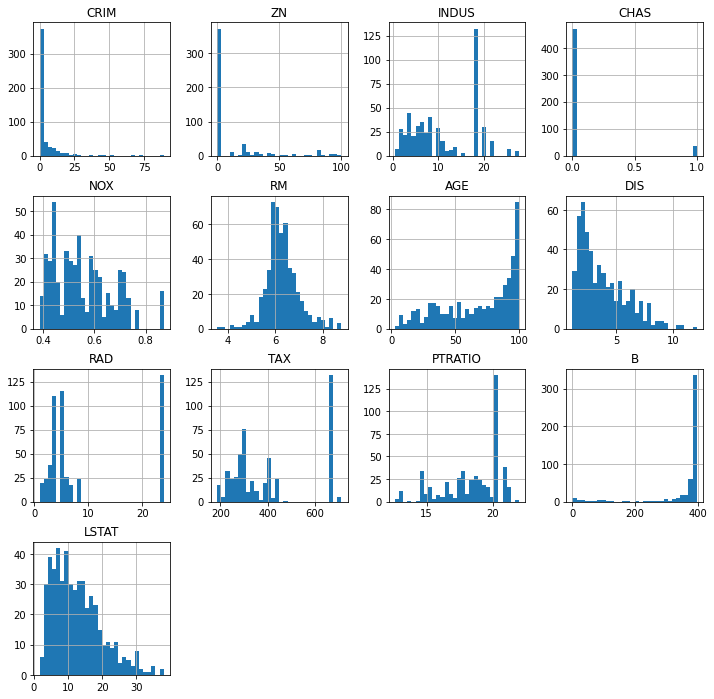

In [6]:
# plot the histogram to inspect variable distributions (not in book)

data.hist(bins=30, figsize=(12,12))
plt.show()

In [7]:

# plot histogram and Q-Q plots to have a look at the variable distribution
# (not in this recipe of the book)

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

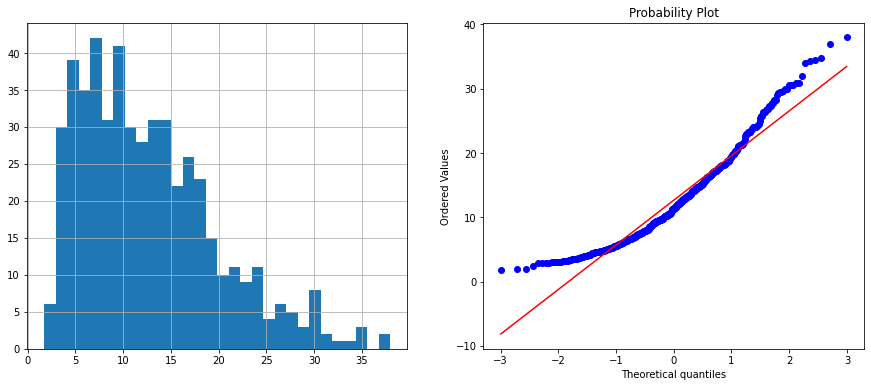

In [8]:
# check original distribution (not included in this recipe of book)

diagnostic_plots(data, 'LSTAT')

## Exponential transformation with NumPy

In [9]:

# make a copy of the dataframe where we will store the modified
# variables

data_tf = data.copy()

In [10]:
# apply a 0.3 exponent power transformation to a set of variables

data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.power(data[['LSTAT', 'NOX', 'DIS', 'RM']], 0.3)

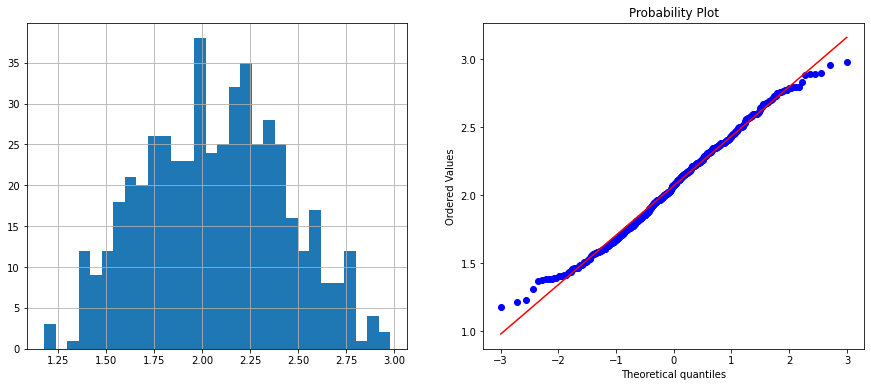

In [11]:
# visuallize the transformation (not included in recipe)

diagnostic_plots(data_tf, 'LSTAT')

## Exponential transformation with Scikit-learn

In [12]:
# initialize the transformer with a user defined function, in this
# case the 0.3 power transformation

transformer = FunctionTransformer(lambda x: np.power(x, 0.3), validate=True)

In [13]:
# capture variables to transform in a list
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform slice of dataframe with indicated variables
data_tf = transformer.transform(data[cols])

In [14]:
# capture returned NumPy array into a dataframe

data_tf = pd.DataFrame(data_tf, columns=cols)

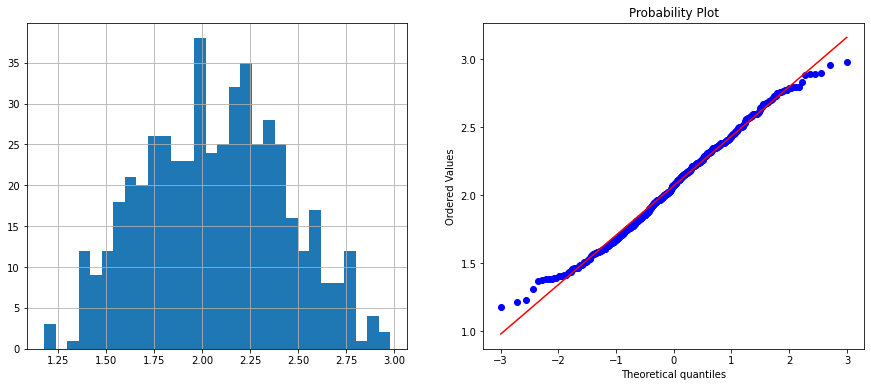

In [15]:
# visualize the transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

## Exponential transformation with Feature-engine

In [16]:
# initialize the transformer with the variables to transform and 
# the desired exponent

et = PowerTransformer(variables = ['LSTAT', 'NOX', 'DIS', 'RM'], exp=0.3)

# fit transformer to data
et.fit(data)

PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX', 'DIS', 'RM'])

In [17]:
# transform indicated variables in the dataset
data_tf = et.transform(data)

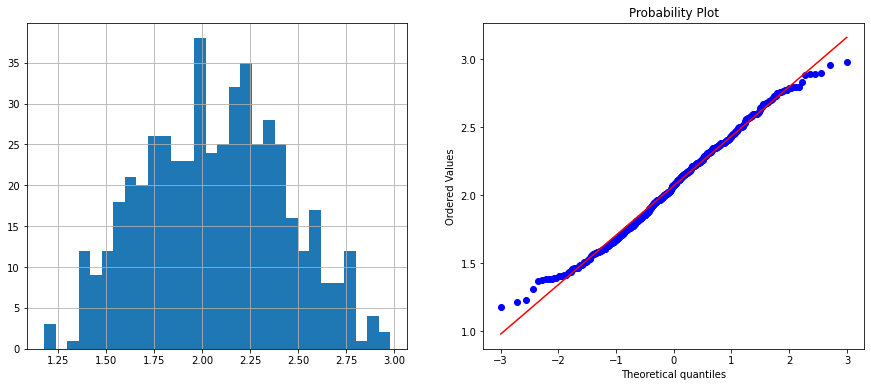

In [18]:
# plot transform variable
diagnostic_plots(data_tf, 'LSTAT')

### Apply different power transformations to different set of features using Feature-engine

In [19]:
from sklearn.pipeline import Pipeline

In [20]:

pipe = Pipeline([
    ('power1', PowerTransformer(variables = ['LSTAT', 'NOX'], exp=0.3)),    
    ('power2', PowerTransformer(variables = ['DIS'], exp=0.4)),
    ('power3', PowerTransformer(variables = ['RM'], exp=0.5)),
     ])

In [21]:
pipe.fit(data)

Pipeline(memory=None,
         steps=[('power1',
                 PowerTransformer(exp=0.3, variables=['LSTAT', 'NOX'])),
                ('power2', PowerTransformer(exp=0.4, variables=['DIS'])),
                ('power3', PowerTransformer(exp=0.5, variables=['RM']))],
         verbose=False)

In [22]:
data_tf = pipe.transform(data)